In [1]:
import scipy
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif
from sklearn.manifold import TSNE
from numpy import mean, std
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro, mannwhitneyu, norm, entropy
from matplotlib import pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [2]:
TCGAHealthy = pd.read_pickle('../Data/TCGAHealthy.pkl')
Cancer = pd.read_pickle('../Data/CancerMulti.pkl')
GTEX = pd.read_pickle('../Data/GTEX.pkl')

In [3]:
TCGAHealthy['Target'] = 1

In [4]:
TCGAHealthy['Target'].value_counts()

1    48
Name: Target, dtype: int64

In [5]:
Cancer['Target'] = Cancer['Target'].apply(lambda x: 2 if (x==1) 
                                           else(3 if (x==2) 
                                                else(4 if (x==3) 
                                                     else(5 if (x==4) 
                                                          else(6 if(x==5) 
                                                               else(0 if(x==0) 
                                                                   else 7))))))

In [6]:
Cancer['Target'].value_counts()

6    127
3    122
4     79
5     60
2     38
Name: Target, dtype: int64

In [7]:
data = Cancer.append(GTEX.append(TCGAHealthy))
#data = Cancer.append(GTEX)

In [8]:
data.reset_index(drop = True, inplace = True)

In [9]:
data['Target'].value_counts()

6    127
3    122
0    106
4     79
5     60
1     48
2     38
Name: Target, dtype: int64

In [10]:
data = data.sample(frac=1).reset_index(drop=True)

In [11]:
data

GeneID,CUL5-8065,REV1-51455,ZNF428-126299,CX3CR1-1524,FAXC-84553,PKP2-5318,BNIP2-663,HOXB7-3217,GRIN3A-116443,FCRL5-83416,...,GATA6-2627,COL28A1-340267,PDK3-5165,MC1R-4157,IFT74-80173,CDK14-5218,RP11-762I7.5-0,GSR-2936,UBQLN4-56893,Target
0,224.97,638.15,1191.69,37.32,395.18,281.09,941.27,31.45,29.27,38.67,...,54.33,108.90,172.65,94.67,371.22,387.02,6.67,1322.37,624.99,0
1,303.44,934.76,525.39,85.22,191.67,314.17,1111.82,62.56,36.79,7.94,...,69.52,31.45,96.68,273.37,351.14,343.89,0.00,915.51,836.53,0
2,193.01,476.71,1096.50,29.27,117.60,277.20,780.44,72.01,14.03,3.17,...,45.85,376.41,92.70,429.54,221.86,305.55,11.64,836.53,708.18,6
3,283.05,669.92,1388.16,14.56,253.23,281.09,921.88,29.27,149.12,158.79,...,107.38,45.53,158.79,214.27,307.69,157.68,4.82,1561.89,684.02,5
4,212.78,525.39,536.45,14.56,231.32,346.29,981.29,32.36,1.04,0.39,...,39.50,157.68,248.00,78.89,141.02,147.06,0.00,967.76,1159.07,0
5,323.03,638.15,1008.90,63.45,305.55,420.68,921.88,32.36,591.22,16.75,...,43.32,42.71,157.68,102.97,376.41,438.59,3.20,1268.46,802.41,4
6,269.60,599.49,1216.75,6.01,87.65,110.43,866.07,429.54,11.73,0.78,...,105.89,1073.91,228.13,287.01,105.15,92.70,23.08,579.04,974.50,6
7,191.67,435.55,1437.15,11.55,136.19,208.38,693.58,30.12,68.55,0.78,...,42.11,186.40,37.85,158.79,299.25,132.44,11.30,1135.20,693.58,6
8,346.29,497.00,842.36,81.14,547.75,329.84,1378.57,68.55,51.71,3.38,...,176.29,82.29,170.25,19.39,291.04,429.54,0.66,1023.00,785.88,1
9,229.72,353.59,1639.59,9.41,547.75,65.26,420.68,30.34,163.28,2.51,...,24.81,21.94,127.89,84.04,209.84,137.14,12.00,1159.07,616.37,6


In [12]:
# This is from when groups were used at the start
#data.to_pickle("../Data/ProstateGroups.pkl")

## MI

In [13]:
summary = pd.read_pickle('../Data/MI_Grades_NoSplit5.pkl')

In [14]:
top_nosplit = np.hstack([summary.sort_values('MutualInfo',ascending=False).head(20)["GeneID"].values,['Target']])

In [15]:
data = data[top_nosplit]
#dataReduced1 = PCA(n_components=50).fit_transform(data.drop("Target",axis=1))
dataReduced2 = TSNE(n_components=1).fit_transform(data.drop("Target",axis=1))

In [16]:
Target = data['Target']

In [17]:
dataReduced2 = pd.DataFrame(dataReduced2)

In [18]:
dataReduced2['Target'] = Target

In [19]:
G0Reduced2 = dataReduced2[dataReduced2['Target'] == 0]
G1Reduced2 = dataReduced2[dataReduced2['Target'] == 1]
One = dataReduced2[dataReduced2['Target'] == 2]
Two = dataReduced2[dataReduced2['Target'] == 3]
G3Reduced2 = dataReduced2[dataReduced2['Target'] == 4]
Four = dataReduced2[dataReduced2['Target'] == 5]
Five = dataReduced2[dataReduced2['Target'] == 6]
G2Reduced2 = One.append(Two)
G4Reduced2 = Four.append(Five)
Healthy = G0Reduced2.append(G1Reduced2)
Cancerous = G2Reduced2.append(G3Reduced2.append(G4Reduced2))
ThreeFourFive = G3Reduced2.append(G4Reduced2)
OneTwoThree = G2Reduced2.append(G3Reduced2)

In [20]:
G0Reduced2.reset_index(inplace=True, drop=True)
G1Reduced2.reset_index(inplace=True, drop=True)
G2Reduced2.reset_index(inplace=True, drop=True)
G3Reduced2.reset_index(inplace=True, drop=True)
G4Reduced2.reset_index(inplace=True, drop=True)
Healthy.reset_index(inplace=True, drop=True)
Cancerous.reset_index(inplace=True, drop=True)
OneTwoThree.reset_index(inplace=True, drop=True)
ThreeFourFive.reset_index(inplace=True, drop=True)
One.reset_index(inplace=True, drop=True)
Two.reset_index(inplace=True, drop=True)
Four.reset_index(inplace=True, drop=True)
Five.reset_index(inplace=True, drop=True)

In [21]:
print(G0Reduced2['Target'].value_counts())
print(G1Reduced2['Target'].value_counts())
print(G2Reduced2['Target'].value_counts())
print(G3Reduced2['Target'].value_counts())
print(G4Reduced2['Target'].value_counts())
print(Healthy['Target'].value_counts())
print(Cancerous['Target'].value_counts())
print(ThreeFourFive['Target'].value_counts())
print(OneTwoThree['Target'].value_counts())
print(One['Target'].value_counts())
print(Two['Target'].value_counts())
print(Four['Target'].value_counts())
print(Five['Target'].value_counts())

0    106
Name: Target, dtype: int64
1    48
Name: Target, dtype: int64
3    122
2     38
Name: Target, dtype: int64
4    79
Name: Target, dtype: int64
6    127
5     60
Name: Target, dtype: int64
0    106
1     48
Name: Target, dtype: int64
6    127
3    122
4     79
5     60
2     38
Name: Target, dtype: int64
6    127
4     79
5     60
Name: Target, dtype: int64
3    122
4     79
2     38
Name: Target, dtype: int64
2    38
Name: Target, dtype: int64
3    122
Name: Target, dtype: int64
5    60
Name: Target, dtype: int64
6    127
Name: Target, dtype: int64


In [22]:
TargetG0Reduced2 = G0Reduced2['Target']
TargetOne = One['Target']
G0Reduced2.drop('Target', inplace = True, axis=1)
G1Reduced2.drop('Target', inplace = True, axis=1)
G2Reduced2.drop('Target', inplace = True, axis=1)
G3Reduced2.drop('Target', inplace = True, axis=1)
G4Reduced2.drop('Target', inplace = True, axis=1)
Healthy.drop('Target', inplace = True, axis=1)
Cancerous.drop('Target', inplace = True, axis=1)
ThreeFourFive.drop('Target', inplace = True, axis=1)
OneTwoThree.drop('Target', inplace = True, axis=1)
One.drop('Target', inplace = True, axis=1)
Two.drop('Target', inplace = True, axis=1)
Four.drop('Target', inplace = True, axis=1)
Five.drop('Target', inplace = True, axis=1)

/Users/martincasey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/martincasey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/martincasey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ve

In [23]:
G0Reduced2 = G0Reduced2[0]
G1Reduced2 = G1Reduced2[0]
G2Reduced2 = G2Reduced2[0]
G3Reduced2 = G3Reduced2[0]
G4Reduced2 = G4Reduced2[0]
Healthy = Healthy[0]
Cancerous = Cancerous[0]
ThreeFourFive = ThreeFourFive[0]
OneTwoThree = OneTwoThree[0]
One = One[0]
Two = Two[0]
Four = Four[0]
Five = Five[0]

In [24]:
#With TCGA Healthy
exportData = dataReduced2.copy(deep=True)

In [25]:
exportData['Grade'] = exportData['Target'].apply(lambda x: 0 if (x==0) 
                                           else(1 if (x==1) 
                                                else(2 if (x==2) 
                                                     else(3 if (x==3) 
                                                          else(4 if(x==4) 
                                                               else(5 if(x==5) 
                                                                   else(6 if(x==6)
                                                                        else 7)))))))
exportData['Cancerous'] = exportData['Target'].apply(lambda x: 0 if (x==0) 
                                           else(0 if (x==1) 
                                                else(1 if (x==2) 
                                                     else(1 if (x==3) 
                                                          else(1 if(x==4) 
                                                               else(1 if(x==5) 
                                                                   else(1 if(x==6)
                                                                        else 2)))))))
exportData['Group'] = exportData['Target'].apply(lambda x: 0 if (x==0) 
                                           else(1 if (x==1) 
                                                else(2 if (x==2) 
                                                     else(2 if (x==3) 
                                                          else(3 if(x==4) 
                                                               else(4 if(x==5) 
                                                                   else(4 if(x==6)
                                                                        else 5)))))))
exportData['OneTwoThree'] = exportData['Target'].apply(lambda x: 0 if (x==0) 
                                           else(0 if (x==1) 
                                                else(1 if (x==2) 
                                                     else(1 if (x==3) 
                                                          else(1 if(x==4) 
                                                               else(2 if(x==5) 
                                                                   else(2 if(x==6)
                                                                        else 3)))))))
exportData['ThreeFourFive'] = exportData['Target'].apply(lambda x: 0 if (x==0) 
                                           else(0 if (x==1) 
                                                else(1 if (x==2) 
                                                     else(1 if (x==3) 
                                                          else(2 if(x==4) 
                                                               else(2 if(x==5) 
                                                                   else(2 if(x==6)
                                                                        else 3)))))))

In [26]:
exportData

,0,Target,Grade,Cancerous,Group,OneTwoThree,ThreeFourFive
0,14.078424,0,0,0,0,0,0
1,25.676012,0,0,0,0,0,0
2,0.117130,6,6,1,4,2,2
3,-9.850016,5,5,1,4,2,2
4,16.687490,0,0,0,0,0,0
5,-1.456921,4,4,1,3,1,2
6,-2.728846,6,6,1,4,2,2
7,-26.039242,6,6,1,4,2,2
8,19.966530,1,1,0,1,0,0
9,-11.316241,6,6,1,4,2,2


In [27]:
exportData.set_index(exportData[0], inplace=True)
exportData.drop([0], inplace=True, axis=1)
exportData.drop('Target', inplace=True, axis=1)

In [28]:
exportData

,Grade,Cancerous,Group,OneTwoThree,ThreeFourFive
0,,,,,
14.078424,0,0,0,0,0
25.676012,0,0,0,0,0
0.117130,6,1,4,2,2
-9.850016,5,1,4,2,2
16.687490,0,0,0,0,0
-1.456921,4,1,3,1,2
-2.728846,6,1,4,2,2
-26.039242,6,1,4,2,2
19.966530,1,0,1,0,0


In [29]:
#With TCGA Healthy
exportData.to_csv("../Data/exportData20.csv")

## Normality Testing

In [30]:
print("GTEx: " + str(mean(G0Reduced2)))
print("TCGA Healthy: " + str(mean(G1Reduced2)))
print("Group 1 (Grade 1 and 2): " + str(mean(G2Reduced2)))
print("Group 2 (Grade 3): " + str(mean(G3Reduced2)))
print("Group 3 (Grade 4 and 5): " + str(mean(G4Reduced2)))

GTEx: 24.051698684692383
TCGA Healthy: 21.705766677856445
Group 1 (Grade 1 and 2): -6.96563196182251
Group 2 (Grade 3): -11.18264389038086
Group 3 (Grade 4 and 5): -6.404283046722412


In [31]:
print("GTEx: " + str(std(G0Reduced2)))
print("TCGA Healthy: " + str(std(G1Reduced2)))
print("Group 1 (Grade 1 and 2): " + str(std(G2Reduced2)))
print("Group 2 (Grade 3): " + str(std(G3Reduced2)))
print("Group 3 (Grade 4 and 5): " + str(std(G4Reduced2)))

GTEx: 5.730755805969238
TCGA Healthy: 8.49921703338623
Group 1 (Grade 1 and 2): 14.346939086914062
Group 2 (Grade 3): 12.880051612854004
Group 3 (Grade 4 and 5): 12.769207000732422


(0.0, 30.0)

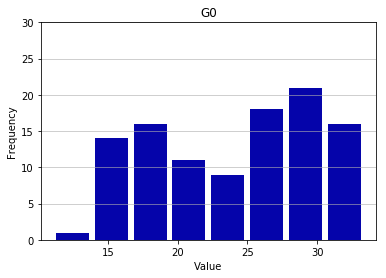

In [32]:
n, bins, patches = plt.hist(x=G0Reduced2, bins='auto', color='#0504aa', rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('G0')
#plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 20.0)

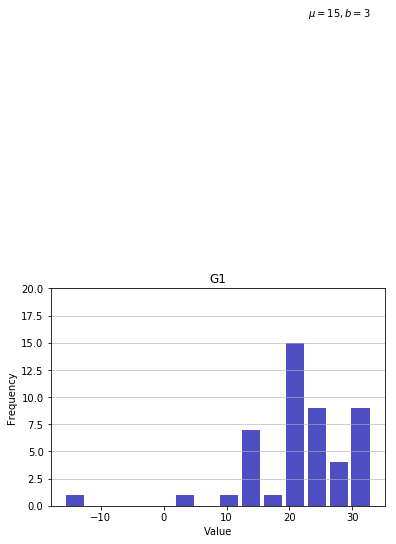

In [33]:
n, bins, patches = plt.hist(x=G1Reduced2, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('G1')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 30.0)

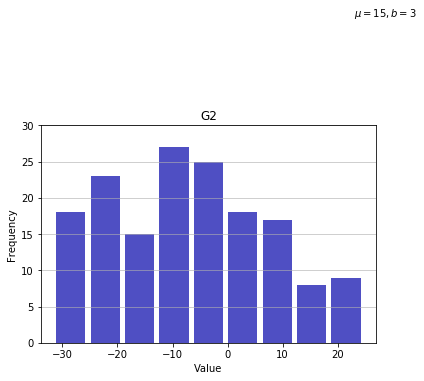

In [34]:
n, bins, patches = plt.hist(x=G2Reduced2, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('G2')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 20.0)

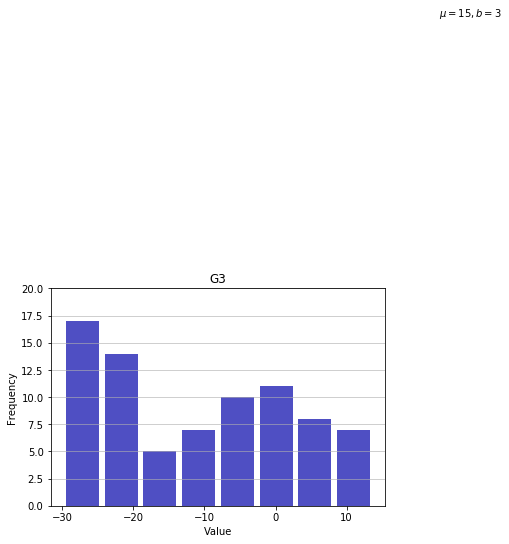

In [35]:
n, bins, patches = plt.hist(x=G3Reduced2, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('G3')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 40.0)

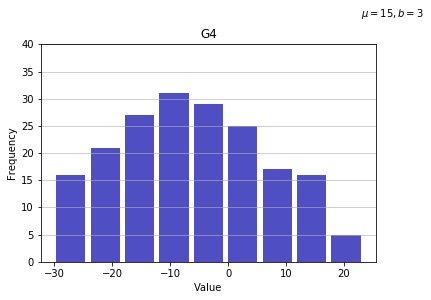

In [36]:
n1, bins1, patches1 = plt.hist(x=G4Reduced2, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('G4')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n1.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 20.0)

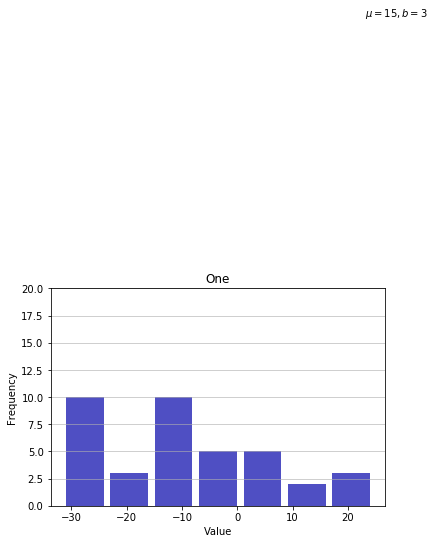

In [37]:
n1, bins1, patches1 = plt.hist(x=One, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('One')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n1.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 30.0)

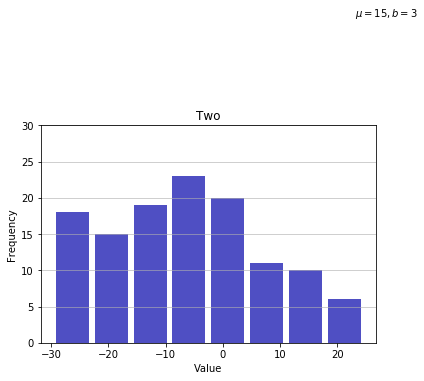

In [38]:
n1, bins1, patches1 = plt.hist(x=Two, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Two')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n1.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 20.0)

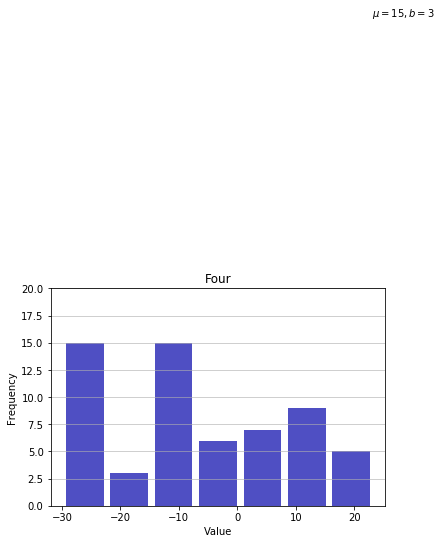

In [39]:
n1, bins1, patches1 = plt.hist(x=Four, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Four')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n1.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 30.0)

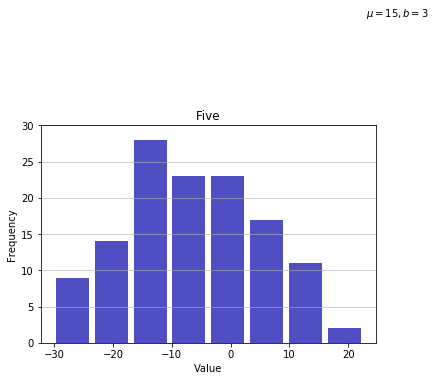

In [40]:
n1, bins1, patches1 = plt.hist(x=Five, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Five')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n1.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

/Users/martincasey/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'Healthy vs Cancerous')

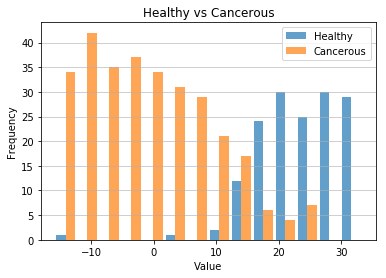

In [41]:
n1, bins1, patches1 = plt.hist([Healthy,Cancerous], bins='auto',
                            alpha=0.7, rwidth=0.85, label = ['Healthy', 'Cancerous'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Healthy vs Cancerous')

/Users/martincasey/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'Group 1 (Grade 1 and 2) vs Grade 3 + Grade 4 + Grade 5')

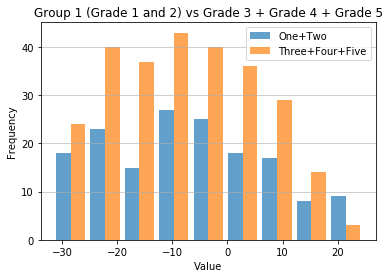

In [42]:
n1, bins1, patches1 = plt.hist([G2Reduced2,ThreeFourFive], bins='auto',
                            alpha=0.7, rwidth=0.85, label = ['One+Two', 'Three+Four+Five'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Group 1 (Grade 1 and 2) vs Grade 3 + Grade 4 + Grade 5')

/Users/martincasey/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'Grade 1 + Grade 2 + Grade 3 vs Group 3(Grade 4 + Grade 5)')

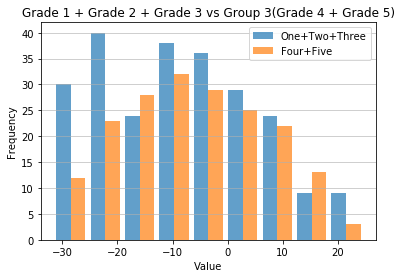

In [43]:
n1, bins1, patches1 = plt.hist([OneTwoThree,G4Reduced2], bins='auto',
                            alpha=0.7, rwidth=0.85, label = ['One+Two+Three', 'Four+Five'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Grade 1 + Grade 2 + Grade 3 vs Group 3(Grade 4 + Grade 5)')

/Users/martincasey/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'Grade 1 vs Grade 5')

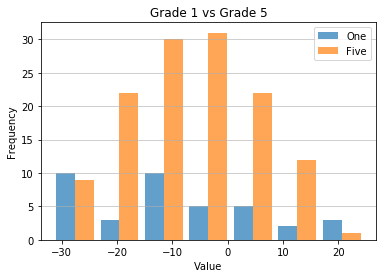

In [44]:
n1, bins1, patches1 = plt.hist([One,Five], bins='auto',
                            alpha=0.7, rwidth=0.85, label = ['One', 'Five'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Grade 1 vs Grade 5')

/Users/martincasey/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'GTEX vs. (Grade 1 + Grade 2)')

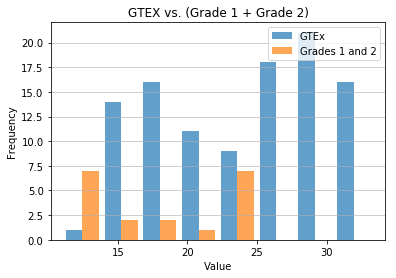

In [45]:
n1, bins1, patches1 = plt.hist([G0Reduced2,G2Reduced2], bins='auto',
                            alpha=0.7, rwidth=0.85, label = ['GTEx', 'Grades 1 and 2'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('GTEX vs. (Grade 1 + Grade 2)')

/Users/martincasey/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'GTEX vs. Grade 3')

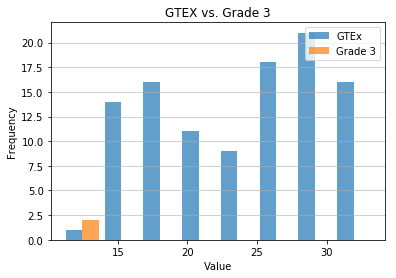

In [46]:
n1, bins1, patches1 = plt.hist([G0Reduced2,G3Reduced2], bins='auto',
                            alpha=0.7, rwidth=0.85, label = ['GTEx', 'Grade 3'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('GTEX vs. Grade 3')

/Users/martincasey/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'GTEX vs. (Grade 4 + Grade 5)')

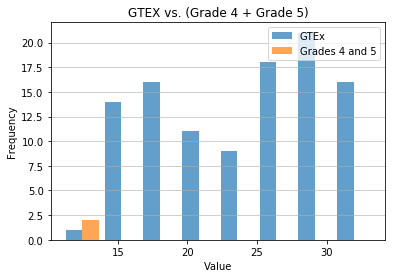

In [47]:
n1, bins1, patches1 = plt.hist([G0Reduced2,G3Reduced2], bins='auto',
                            alpha=0.7, rwidth=0.85, label = ['GTEx', 'Grades 4 and 5'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('GTEX vs. (Grade 4 + Grade 5)')

/Users/martincasey/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'(Grade 1 + Grade 2) vs. Grade 3')

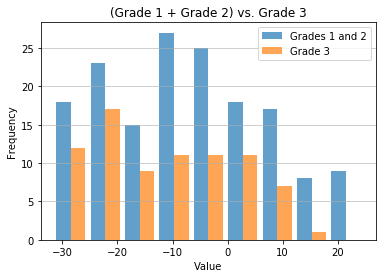

In [48]:
n1, bins1, patches1 = plt.hist([G2Reduced2,G3Reduced2], bins='auto',
                            alpha=0.7, rwidth=0.85, label = ['Grades 1 and 2', 'Grade 3'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('(Grade 1 + Grade 2) vs. Grade 3')

/Users/martincasey/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'(Grade 1 + Grade 2) vs. (Grade 4 + Grade 5)')

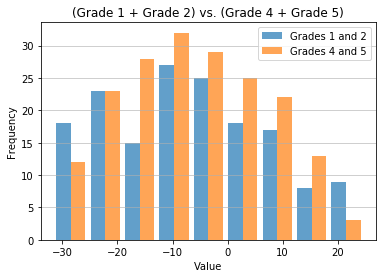

In [49]:
n1, bins1, patches1 = plt.hist([G2Reduced2,G4Reduced2], bins='auto',
                            alpha=0.7, rwidth=0.85, label = ['Grades 1 and 2', 'Grades 4 and 5'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('(Grade 1 + Grade 2) vs. (Grade 4 + Grade 5)')

/Users/martincasey/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'GTEx vs TCGA Healthy')

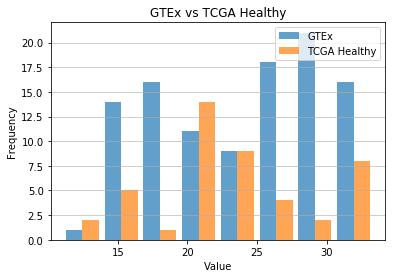

In [50]:
n1, bins1, patches1 = plt.hist([G0Reduced2,G1Reduced2], bins='auto',
                            alpha=0.7, rwidth=0.85, label = ['GTEx', 'TCGA Healthy'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('GTEx vs TCGA Healthy')

/Users/martincasey/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'GTEx vs Grade 5')

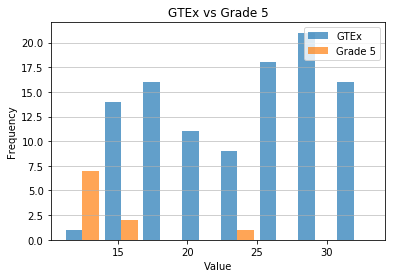

In [51]:
n1, bins1, patches1 = plt.hist([G0Reduced2,Five], bins='auto',
                            alpha=0.7, rwidth=0.85, label = ['GTEx', 'Grade 5'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('GTEx vs Grade 5')

/Users/martincasey/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'TCGA Healthy vs Grade 5')

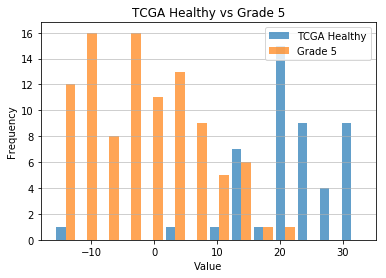

In [52]:
n1, bins1, patches1 = plt.hist([G1Reduced2,Five], bins='auto',
                            alpha=0.7, rwidth=0.85, label = ['TCGA Healthy', 'Grade 5'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('TCGA Healthy vs Grade 5')

### QQ Plot

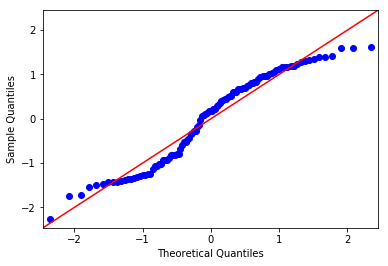

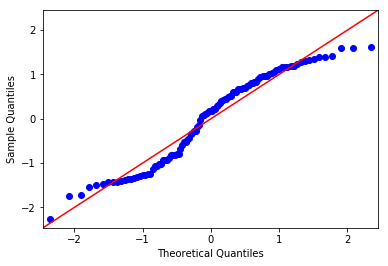

In [53]:
qqplot(G0Reduced2, line = '45', fit = True)

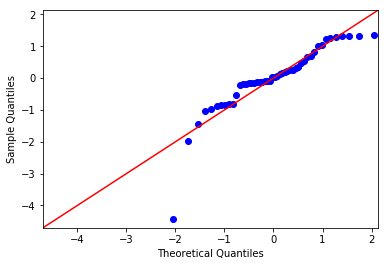

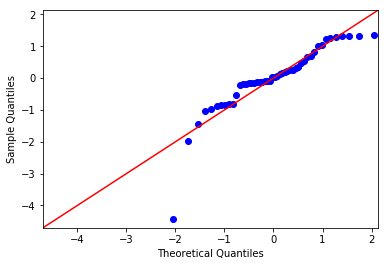

In [54]:
qqplot(G1Reduced2, line = '45', fit = True)

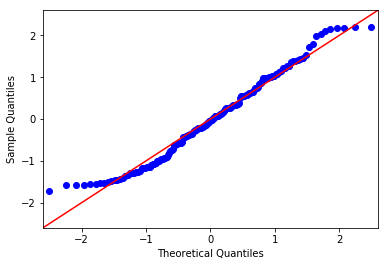

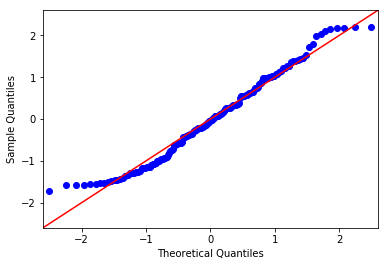

In [55]:
qqplot(G2Reduced2, line = '45', fit = True)

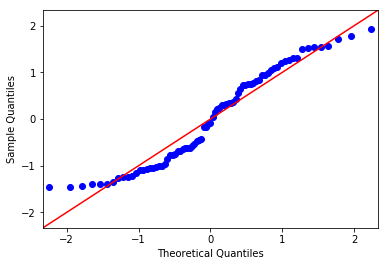

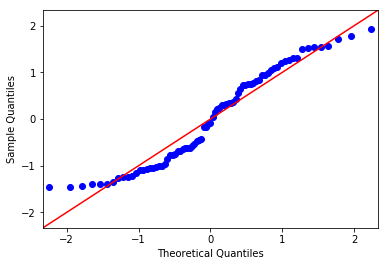

In [56]:
qqplot(G3Reduced2, line = '45', fit = True)

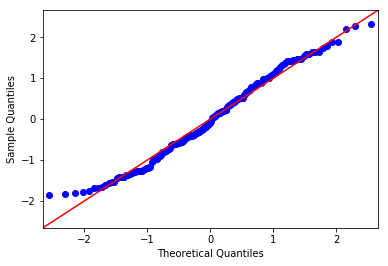

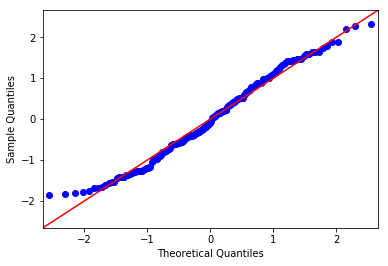

In [57]:
qqplot(G4Reduced2, line = '45', fit = True)

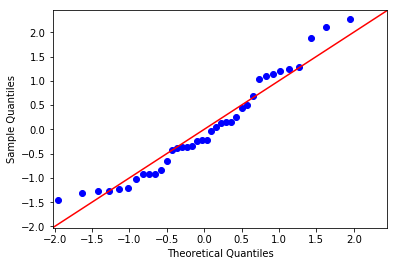

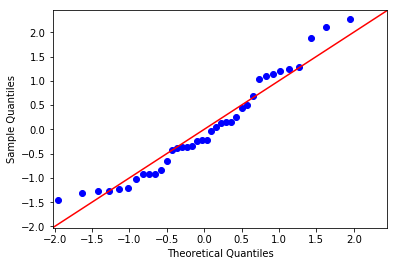

In [58]:
qqplot(One, line = '45', fit = True)

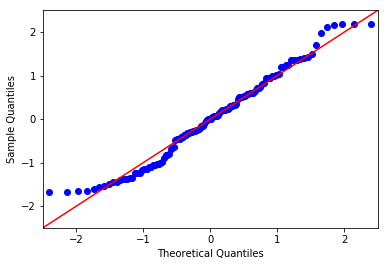

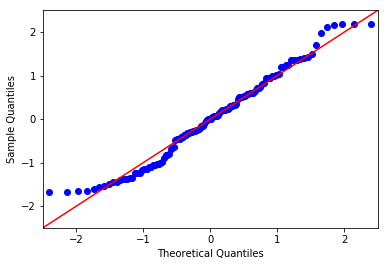

In [59]:
qqplot(Two, line = '45', fit = True)

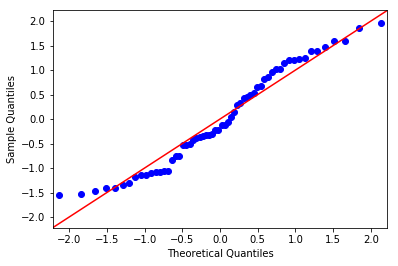

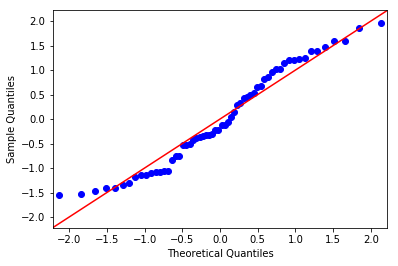

In [60]:
qqplot(Four, line = '45', fit = True)

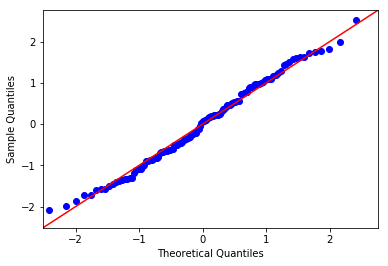

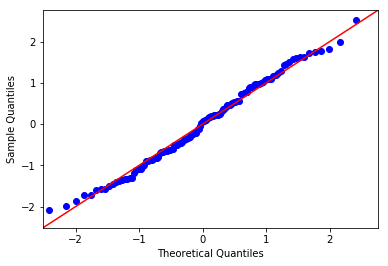

In [61]:
qqplot(Five, line = '45', fit = True)

### Shapiro-Wilk Test

In [62]:
stat, p = shapiro(G0Reduced2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.941, p=0.000
Sample does not look Gaussian (reject H0)


In [63]:
stat, p = shapiro(G1Reduced2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.856, p=0.000
Sample does not look Gaussian (reject H0)


In [64]:
stat, p = shapiro(G2Reduced2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.970, p=0.002
Sample does not look Gaussian (reject H0)


In [65]:
stat, p = shapiro(G3Reduced2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.935, p=0.001
Sample does not look Gaussian (reject H0)


In [66]:
stat, p = shapiro(G4Reduced2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.980, p=0.009
Sample does not look Gaussian (reject H0)


In [67]:
stat, p = shapiro(One)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.944, p=0.058
Sample looks Gaussian (fail to reject H0)


In [68]:
stat, p = shapiro(Two)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.972, p=0.013
Sample does not look Gaussian (reject H0)


In [69]:
stat, p = shapiro(Four)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.950, p=0.015
Sample does not look Gaussian (reject H0)


In [70]:
stat, p = shapiro(Five)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.987, p=0.266
Sample looks Gaussian (fail to reject H0)


Since the GTEX group and some of the others are not gaussian, we will have to use a non-parametric test

## Mann-Whitney U (Comparing all to GTEX)

In [71]:
stat, p = mannwhitneyu(G0Reduced2, G0Reduced2, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=5618.000, p=0.999
Two samples come from the same population (fail to reject H0)


In [72]:
stat, p = mannwhitneyu(G0Reduced2, G1Reduced2, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=2910.000, p=0.154
Two samples come from the same population (fail to reject H0)


In [73]:
stat, p = mannwhitneyu(G0Reduced2, G2Reduced2, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=16533.000, p=0.000
A particular population tends to have larger value compared to the other (reject H0)


In [74]:
stat, p = mannwhitneyu(G0Reduced2, G3Reduced2, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=8372.000, p=0.000
A particular population tends to have larger value compared to the other (reject H0)


In [75]:
stat, p = mannwhitneyu(G0Reduced2, G4Reduced2, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=19611.000, p=0.000
A particular population tends to have larger value compared to the other (reject H0)


In [76]:
stat, p = mannwhitneyu(G0Reduced2, One, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=3909.000, p=0.000
A particular population tends to have larger value compared to the other (reject H0)


In [77]:
stat, p = mannwhitneyu(G0Reduced2, Two, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=12624.000, p=0.000
A particular population tends to have larger value compared to the other (reject H0)


In [78]:
stat, p = mannwhitneyu(G0Reduced2, Four, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=6216.000, p=0.000
A particular population tends to have larger value compared to the other (reject H0)


In [79]:
stat, p = mannwhitneyu(G0Reduced2, Five, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=13395.000, p=0.000
A particular population tends to have larger value compared to the other (reject H0)


## Mann-Whitney U (Comparing All to G1)

In [80]:
stat, p = mannwhitneyu(G1Reduced2, G0Reduced2, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=2178.000, p=0.154
Two samples come from the same population (fail to reject H0)


In [81]:
stat, p = mannwhitneyu(G1Reduced2, G1Reduced2, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=1152.000, p=0.997
Two samples come from the same population (fail to reject H0)


In [82]:
stat, p = mannwhitneyu(G1Reduced2, G2Reduced2, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=7262.000, p=0.000
A particular population tends to have larger value compared to the other (reject H0)


In [83]:
stat, p = mannwhitneyu(G1Reduced2, G3Reduced2, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=3732.000, p=0.000
A particular population tends to have larger value compared to the other (reject H0)


In [84]:
stat, p = mannwhitneyu(G1Reduced2, G4Reduced2, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=8654.000, p=0.000
A particular population tends to have larger value compared to the other (reject H0)


In [85]:
stat, p = mannwhitneyu(G1Reduced2, One, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=1726.000, p=0.000
A particular population tends to have larger value compared to the other (reject H0)


In [86]:
stat, p = mannwhitneyu(G1Reduced2, Two, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=5536.000, p=0.000
A particular population tends to have larger value compared to the other (reject H0)


In [87]:
stat, p = mannwhitneyu(G1Reduced2, Four, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=2732.000, p=0.000
A particular population tends to have larger value compared to the other (reject H0)


In [88]:
stat, p = mannwhitneyu(G1Reduced2, Five, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=5922.000, p=0.000
A particular population tends to have larger value compared to the other (reject H0)


## Mann-Whitney U (Comparing All to G3)

In [89]:
stat, p = mannwhitneyu(G3Reduced2, G0Reduced2, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=2.000, p=0.000
A particular population tends to have larger value compared to the other (reject H0)


In [90]:
stat, p = mannwhitneyu(G3Reduced2, G1Reduced2, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=60.000, p=0.000
A particular population tends to have larger value compared to the other (reject H0)


In [91]:
stat, p = mannwhitneyu(G3Reduced2, G2Reduced2, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=5370.000, p=0.059
Two samples come from the same population (fail to reject H0)


In [92]:
stat, p = mannwhitneyu(G3Reduced2, G3Reduced2, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=3120.500, p=0.999
Two samples come from the same population (fail to reject H0)


In [93]:
stat, p = mannwhitneyu(G3Reduced2, G4Reduced2, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=5886.000, p=0.009
A particular population tends to have larger value compared to the other (reject H0)


In [94]:
stat, p = mannwhitneyu(G3Reduced2, One, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=1450.000, p=0.769
Two samples come from the same population (fail to reject H0)


In [95]:
stat, p = mannwhitneyu(G3Reduced2, Two, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=3920.000, p=0.026
A particular population tends to have larger value compared to the other (reject H0)


In [96]:
stat, p = mannwhitneyu(G3Reduced2, Four, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=1952.000, p=0.076
Two samples come from the same population (fail to reject H0)


In [97]:
stat, p = mannwhitneyu(G3Reduced2, Five, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=3934.000, p=0.009
A particular population tends to have larger value compared to the other (reject H0)


# Comparing all to G2

In [98]:
stat, p = mannwhitneyu(G2Reduced2, G2Reduced2, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=12800.000, p=1.000
Two samples come from the same population (fail to reject H0)


In [99]:
stat, p = mannwhitneyu(G2Reduced2, G4Reduced2, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=14494.000, p=0.617
Two samples come from the same population (fail to reject H0)


In [100]:
stat, p = mannwhitneyu(G2Reduced2, One, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=3419.000, p=0.233
Two samples come from the same population (fail to reject H0)


In [101]:
stat, p = mannwhitneyu(G2Reduced2, Two, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=9381.000, p=0.577
Two samples come from the same population (fail to reject H0)


In [102]:
stat, p = mannwhitneyu(G2Reduced2, Four, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=4739.000, p=0.886
Two samples come from the same population (fail to reject H0)


In [103]:
stat, p = mannwhitneyu(G2Reduced2, Five, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=9755.000, p=0.562
Two samples come from the same population (fail to reject H0)


# Comparing All to G4

In [104]:
stat, p = mannwhitneyu(G4Reduced2, One, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=4126.000, p=0.118
Two samples come from the same population (fail to reject H0)


In [105]:
stat, p = mannwhitneyu(G4Reduced2, Two, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=11300.000, p=0.890
Two samples come from the same population (fail to reject H0)


In [106]:
stat, p = mannwhitneyu(G4Reduced2, Four, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=5691.000, p=0.867
Two samples come from the same population (fail to reject H0)


In [107]:
stat, p = mannwhitneyu(G4Reduced2, Five, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=11793.500, p=0.919
Two samples come from the same population (fail to reject H0)


# Comparing all to One

In [108]:
stat, p = mannwhitneyu(One, Two, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=1939.000, p=0.129
Two samples come from the same population (fail to reject H0)


In [109]:
stat, p = mannwhitneyu(One, Four, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=985.000, p=0.260
Two samples come from the same population (fail to reject H0)


In [110]:
stat, p = mannwhitneyu(One, Five, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=1995.000, p=0.106
Two samples come from the same population (fail to reject H0)


# Comparing all to Two

In [111]:
stat, p = mannwhitneyu(Two, Four, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=3754.000, p=0.780
Two samples come from the same population (fail to reject H0)


In [112]:
stat, p = mannwhitneyu(Two, Five, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=7760.000, p=0.982
Two samples come from the same population (fail to reject H0)


# Comparing All to Four

In [113]:
stat, p = mannwhitneyu(Four, Five, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=3729.000, p=0.816
Two samples come from the same population (fail to reject H0)


# Miscellaneous

In [114]:
stat, p = mannwhitneyu(OneTwoThree, G4Reduced2, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=20380.000, p=0.119
Two samples come from the same population (fail to reject H0)


In [115]:
stat, p = mannwhitneyu(G2Reduced2, ThreeFourFive, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=21764.000, p=0.694
Two samples come from the same population (fail to reject H0)


In [116]:
stat, p = mannwhitneyu(Healthy, Cancerous, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=64164.000, p=0.000
A particular population tends to have larger value compared to the other (reject H0)


In [117]:
stat, p = mannwhitneyu(G0Reduced2, G1Reduced2, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=2910.000, p=0.154
Two samples come from the same population (fail to reject H0)


In [118]:
stat, p = mannwhitneyu(G1Reduced2, Five, alternative = 'two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print('A particular population tends to have larger value compared to the other (reject H0)')
else:
    print('Two samples come from the same population (fail to reject H0)')

Statistics=5922.000, p=0.000
A particular population tends to have larger value compared to the other (reject H0)
